In [ ]:
import numpy as np
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plt
import time

In [ ]:
from keras.datasets import cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
required_classes = [1, 3, 5, 9]

In [ ]:
train_index = [i for i, label in enumerate(y_train) if label in required_classes]
test_index = [i for i, label in enumerate(y_test) if label in required_classes]
x_train = x_train[train_index]
y_train = y_train[train_index]
x_test = x_test[test_index]
y_test = y_test[test_index]

In [ ]:
y_train[(y_train == 1)] = 0   # automobile
y_train[(y_train == 3)] = 1   # cat
y_train[(y_train == 5)] = 2   # dog
y_train[(y_train == 9)] = 3   # truck

y_test[(y_test == 1)] = 0   # automobile
y_test[(y_test == 3)] = 1   # cat
y_test[(y_test == 5)] = 2   # dog
y_test[(y_test == 9)] = 3   # truck

In [ ]:
# one hot encode target values
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
x_train_filtered = x_train / 255.0
x_test_filtered = x_test / 255.0

In [ ]:
model= Sequential()
model.add(Conv2D(16,(3,3), activation="sigmoid", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), activation = "sigmoid"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation = "sigmoid"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation="sigmoid"))

model.add(Dense(4, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 32)         

In [ ]:
model.compile(optimizer="adam", loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
print(x_train_filtered.shape)
print(y_train.shape)
print(x_test_filtered.shape)
print(y_test.shape)

(20000, 32, 32, 3)
(20000, 4)
(4000, 32, 32, 3)
(4000, 4)


**Batch_size = 32**

In [ ]:
start = time.time()

history = model.fit(x_train_filtered , y_train, epochs=50 , batch_size = 32, validation_data=(x_test_filtered, y_test))
model.save('cifar.h5')

end = time.time()
print("Run time [s]: ",end-start)

Epoch 1/50
625/625 [==============================] - 34s 55ms/step - loss: 0.5175 - accuracy: 0.7726 - val_loss: 0.5622 - val_accuracy: 0.7598
Epoch 2/50
625/625 [==============================] - 20s 32ms/step - loss: 0.5178 - accuracy: 0.7740 - val_loss: 0.5566 - val_accuracy: 0.7605
Epoch 3/50
625/625 [==============================] - 22s 34ms/step - loss: 0.5131 - accuracy: 0.7766 - val_loss: 0.5643 - val_accuracy: 0.7605
Epoch 4/50
625/625 [==============================] - 22s 34ms/step - loss: 0.5157 - accuracy: 0.7745 - val_loss: 0.5652 - val_accuracy: 0.7567
Epoch 5/50
625/625 [==============================] - 20s 32ms/step - loss: 0.5090 - accuracy: 0.7796 - val_loss: 0.5612 - val_accuracy: 0.7650
Epoch 6/50
625/625 [==============================] - 23s 36ms/step - loss: 0.5094 - accuracy: 0.7782 - val_loss: 0.5731 - val_accuracy: 0.7487
Epoch 7/50
625/625 [==============================] - 22s 35ms/step - loss: 0.5066 - accuracy: 0.7815 - val_loss: 0.5633 - val_accuracy:

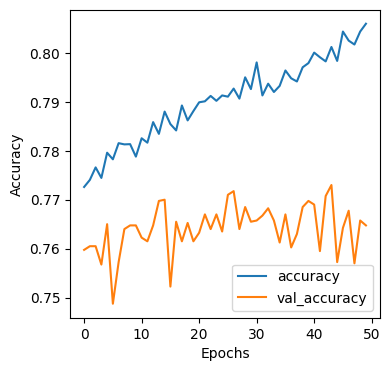

In [ ]:
plt.figure(figsize=(4,4))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.ylim([0.5,1])
plt.legend(loc = 'lower right');

In [ ]:
model.evaluate(x_test, y_test)

125/125 [==============================] - 1s 9ms/step - loss: 1.4339 - accuracy: 0.2500


[1.4338657855987549, 0.25]

**Batch_size = 64**

In [ ]:
start = time.time()

history = model.fit(x_train_filtered , y_train, epochs=50 , batch_size = 64, validation_data=(x_test_filtered, y_test))
model.save('cifar.h5')

end = time.time()
print("Run time [s]: ",end-start)

Epoch 1/50
313/313 [==============================] - 24s 72ms/step - loss: 1.3958 - accuracy: 0.2533 - val_loss: 1.3882 - val_accuracy: 0.2747
Epoch 2/50
313/313 [==============================] - 18s 58ms/step - loss: 1.2360 - accuracy: 0.4097 - val_loss: 1.1387 - val_accuracy: 0.4685
Epoch 3/50
313/313 [==============================] - 20s 62ms/step - loss: 1.1252 - accuracy: 0.4651 - val_loss: 1.0779 - val_accuracy: 0.4860
Epoch 4/50
313/313 [==============================] - 25s 80ms/step - loss: 1.0717 - accuracy: 0.4929 - val_loss: 1.0169 - val_accuracy: 0.5165
Epoch 5/50
313/313 [==============================] - 18s 58ms/step - loss: 1.0400 - accuracy: 0.5088 - val_loss: 0.9802 - val_accuracy: 0.5418
Epoch 6/50
313/313 [==============================] - 19s 62ms/step - loss: 0.9969 - accuracy: 0.5253 - val_loss: 0.9427 - val_accuracy: 0.5452
Epoch 7/50
313/313 [==============================] - 20s 63ms/step - loss: 0.9699 - accuracy: 0.5375 - val_loss: 0.9199 - val_accuracy:

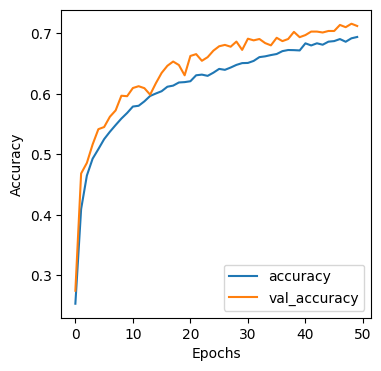

In [ ]:
plt.figure(figsize=(4,4))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.ylim([0.5,1])
plt.legend(loc = 'lower right');


In [ ]:
model.evaluate(x_test, y_test)

125/125 [==============================] - 1s 9ms/step - loss: 1.0965 - accuracy: 0.4685


[1.096512794494629, 0.4684999883174896]

**Batch_size = 128**

In [ ]:
start = time.time()

history = model.fit(x_train_filtered , y_train, epochs=50 , batch_size = 128, validation_data=(x_test_filtered, y_test))
model.save('cifar.h5')

end = time.time()
print("Run time [s]: ",end-start)

Epoch 1/50
157/157 [==============================] - 18s 113ms/step - loss: 0.6682 - accuracy: 0.7036 - val_loss: 0.6580 - val_accuracy: 0.7090
Epoch 2/50
157/157 [==============================] - 20s 126ms/step - loss: 0.6702 - accuracy: 0.7020 - val_loss: 0.6556 - val_accuracy: 0.7138
Epoch 3/50
157/157 [==============================] - 28s 179ms/step - loss: 0.6649 - accuracy: 0.6981 - val_loss: 0.6539 - val_accuracy: 0.7155
Epoch 4/50
157/157 [==============================] - 18s 112ms/step - loss: 0.6661 - accuracy: 0.7032 - val_loss: 0.6553 - val_accuracy: 0.7140
Epoch 5/50
157/157 [==============================] - 19s 118ms/step - loss: 0.6660 - accuracy: 0.7025 - val_loss: 0.6501 - val_accuracy: 0.7200
Epoch 6/50
157/157 [==============================] - 18s 112ms/step - loss: 0.6617 - accuracy: 0.7012 - val_loss: 0.6491 - val_accuracy: 0.7160
Epoch 7/50
157/157 [==============================] - 20s 125ms/step - loss: 0.6646 - accuracy: 0.7009 - val_loss: 0.6479 - val_ac

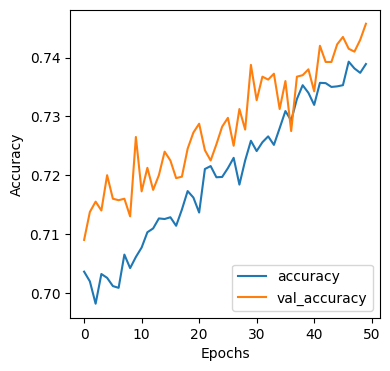

In [ ]:
plt.figure(figsize=(4,4))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.ylim([0.5,1])
plt.legend(loc = 'lower right');


In [ ]:
model.evaluate(x_test, y_test)

125/125 [==============================] - 1s 9ms/step - loss: 1.1000 - accuracy: 0.5098


[1.099961280822754, 0.5097500085830688]